## Import dataset from kaggle

In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: noorrabie
Your Kaggle Key: ··········


100%|██████████| 612M/612M [00:04<00:00, 153MB/s]


##importing libraries used in the project

In [ ]:
import numpy as np 
# numpy to manupilate arrays 
import pandas as pd 
# to read csv file for testing
import os 
# to read images from the folders 
import cv2 
# to apply some image processing
import matplotlib.pyplot as plt 
# to plot graghs  
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)
from matplotlib import style
style.use('fivethirtyeight')

In [ ]:
train_path = '/content/gtsrb-german-traffic-sign/train'
# defining the folder path for training data
test_path = '/content/gtsrb-german-traffic-sign/test'
# defining the folder path for testing data

In [ ]:
IMG_HEIGHT = 30
# defining the desired img height
IMG_WIDTH = 30
# defining the desired img width
channels = 3
# defining the channels which means that the images are in RGB color system

In [ ]:
Root = "/content/gtsrb-german-traffic-sign"
os.chdir(Root)

In [ ]:
NUM_CATEGORIES = len(os.listdir(train_path))
# identifing number of classes in the data set
NUM_CATEGORIES

43

## The classes in the data set defined as follows :

In [ ]:

classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## visualising the number of images in each class 

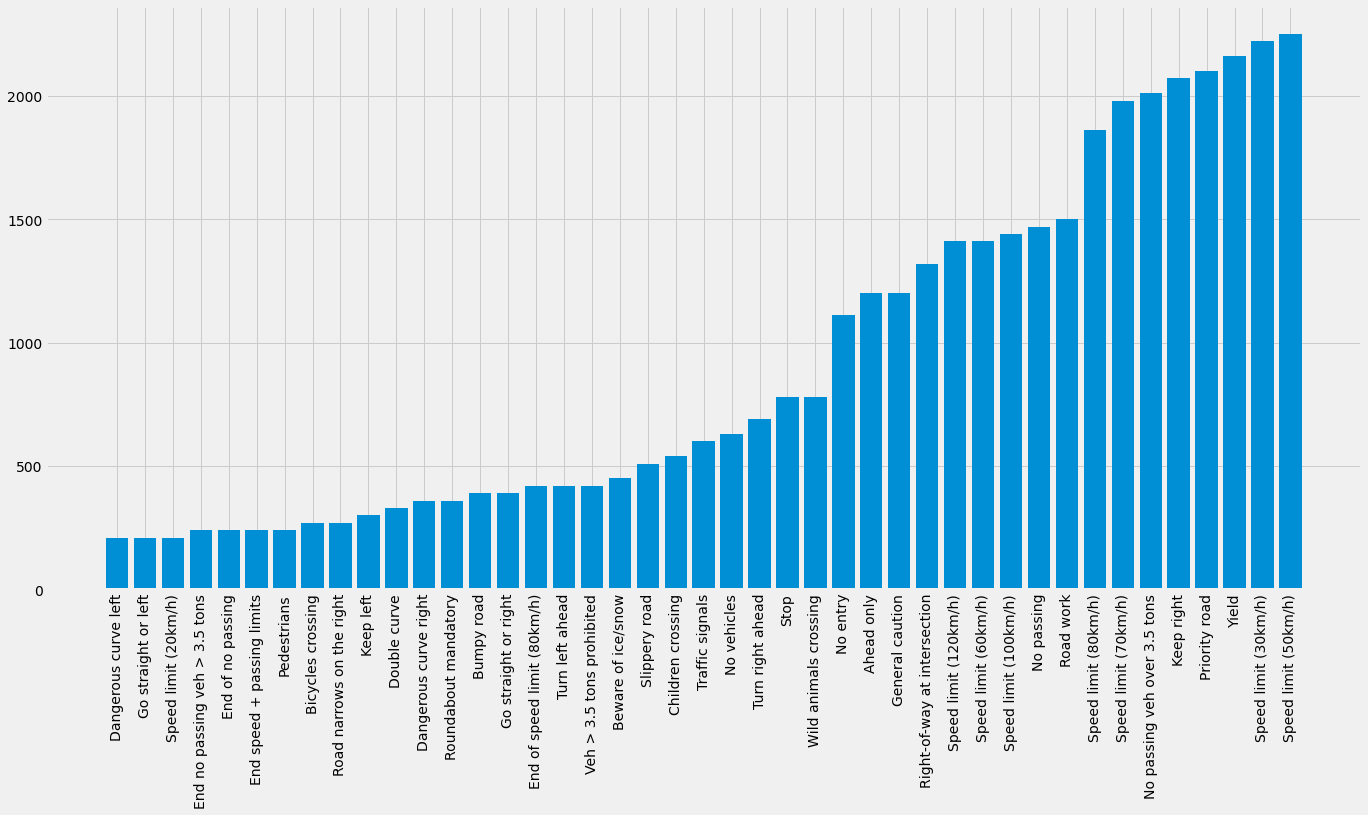

In [ ]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

## Reading the images and appending it in an array to be added to the model

In [ ]:
image_data = []
# an empty list to append images in 
image_labels = []
# an empty list to append the labels in

for i in range(NUM_CATEGORIES):
# for every folder inside the training data that represent the categories firstly we
    images = os.listdir(train_path+'/'+str(i))
    # save all the images of the folder in variable images
    path = train_path+'/'+str(i)
    # save the path of that folder
    for img in images:
    # for every image in the folder
        try:
            image = cv2.imread(path + '/' + img)
            # we read the image 
            image_fromarray = Image.fromarray(image, 'RGB')
            # change it into an array
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            # resize the image by defined size
            image_data.append(np.array(resize_image))
            # append the image
            image_labels.append(i)
            # append the folder number as the label 
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


## we used the shuffle index technique to avoid over fitting

In [ ]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]


## Split data into training data and validation data

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)
# we divide every term by 255 to change the pixel intensity scale from 0-255 to 0-1 scale
X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [ ]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
# we turn the training labesls into categorical labels
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)
# we turn the validation labesls into categorical labels
print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


#Self Made model

## designing the CNN model

This cnn model consists of 2 hidden layers 

1.   double convlution layers(16,32) followed b max pooling layer with batch normalization layer
2.   double convlution layers(64,128) followed b max pooling layer with batch normalization layer

The output layer consists of two fully-connected layers one having 512 nodes wi relu activation and the output has 43 nodes representing the number of categories with a softmax activation


In [ ]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

## Compiling the model

Here we have used an Adam optimizer with a special decay. 
The learning rate used is very small to avoid any overfitting problems

In [ ]:
lr = 0.01
epochs = 30

opt = Adam(learning_rate=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

## Augment images to avoid over fitting and train the first model

In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=64), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30
429/429 [==============================] - 114s 263ms/step - loss: 1.8983 - accuracy: 0.5040 - val_loss: 0.2896 - val_accuracy: 0.9094
Epoch 2/30
429/429 [==============================] - 114s 267ms/step - loss: 0.3758 - accuracy: 0.8828 - val_loss: 0.1023 - val_accuracy: 0.9678
Epoch 3/30
429/429 [==============================] - 106s 246ms/step - loss: 0.1995 - accuracy: 0.9380 - val_loss: 0.0664 - val_accuracy: 0.9799
Epoch 4/30
429/429 [==============================] - 105s 244ms/step - loss: 0.1289 - accuracy: 0.9601 - val_loss: 0.0671 - val_accuracy: 0.9799
Epoch 5/30
429/429 [==============================] - 111s 258ms/step - loss: 0.1031 - accuracy: 0.9693 - val_loss: 0.0376 - val_accuracy: 0.9894
Epoch 6/30
429/429 [==============================] - 107s 250ms/step - loss: 0.0838 - accuracy: 0.9738 - val_loss: 0.0240 - val_accuracy: 0.9930
Epoch 7/30
429/429 [==============================] - 105s 244ms/step - loss: 0.0767 - accuracy: 0.9761 - val_loss: 0.0240 -

In [ ]:
model.save("model.h5")

In [ ]:
model.save_weights("/content/")

In [ ]:
dir(aug)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_validation_split',
 'apply_transform',
 'brightness_range',
 'channel_axis',
 'channel_shift_range',
 'col_axis',
 'cval',
 'data_format',
 'dtype',
 'featurewise_center',
 'featurewise_std_normalization',
 'fill_mode',
 'fit',
 'flow',
 'flow_from_dataframe',
 'flow_from_directory',
 'get_random_transform',
 'height_shift_range',
 'horizontal_flip',
 'interpolation_order',
 'mean',
 'preprocessing_function',
 'random_transform',
 'rescale',
 'rotation_range',
 'row_axis',
 'samplewise_center',
 'samplewise_std_normalization',
 'shear_range',
 'standardize',
 'std',
 'vertica

In [ ]:
model_path = "model.h5"
model = tf.keras.models.load_model(model_path)

##Testing using the test data


In [ ]:
test = pd.read_csv('/content/gtsrb-german-traffic-sign/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread('/content/gtsrb-german-traffic-sign' + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

395/395 [==============================] - 12s 30ms/step
Test Data accuracy:  97.91765637371338


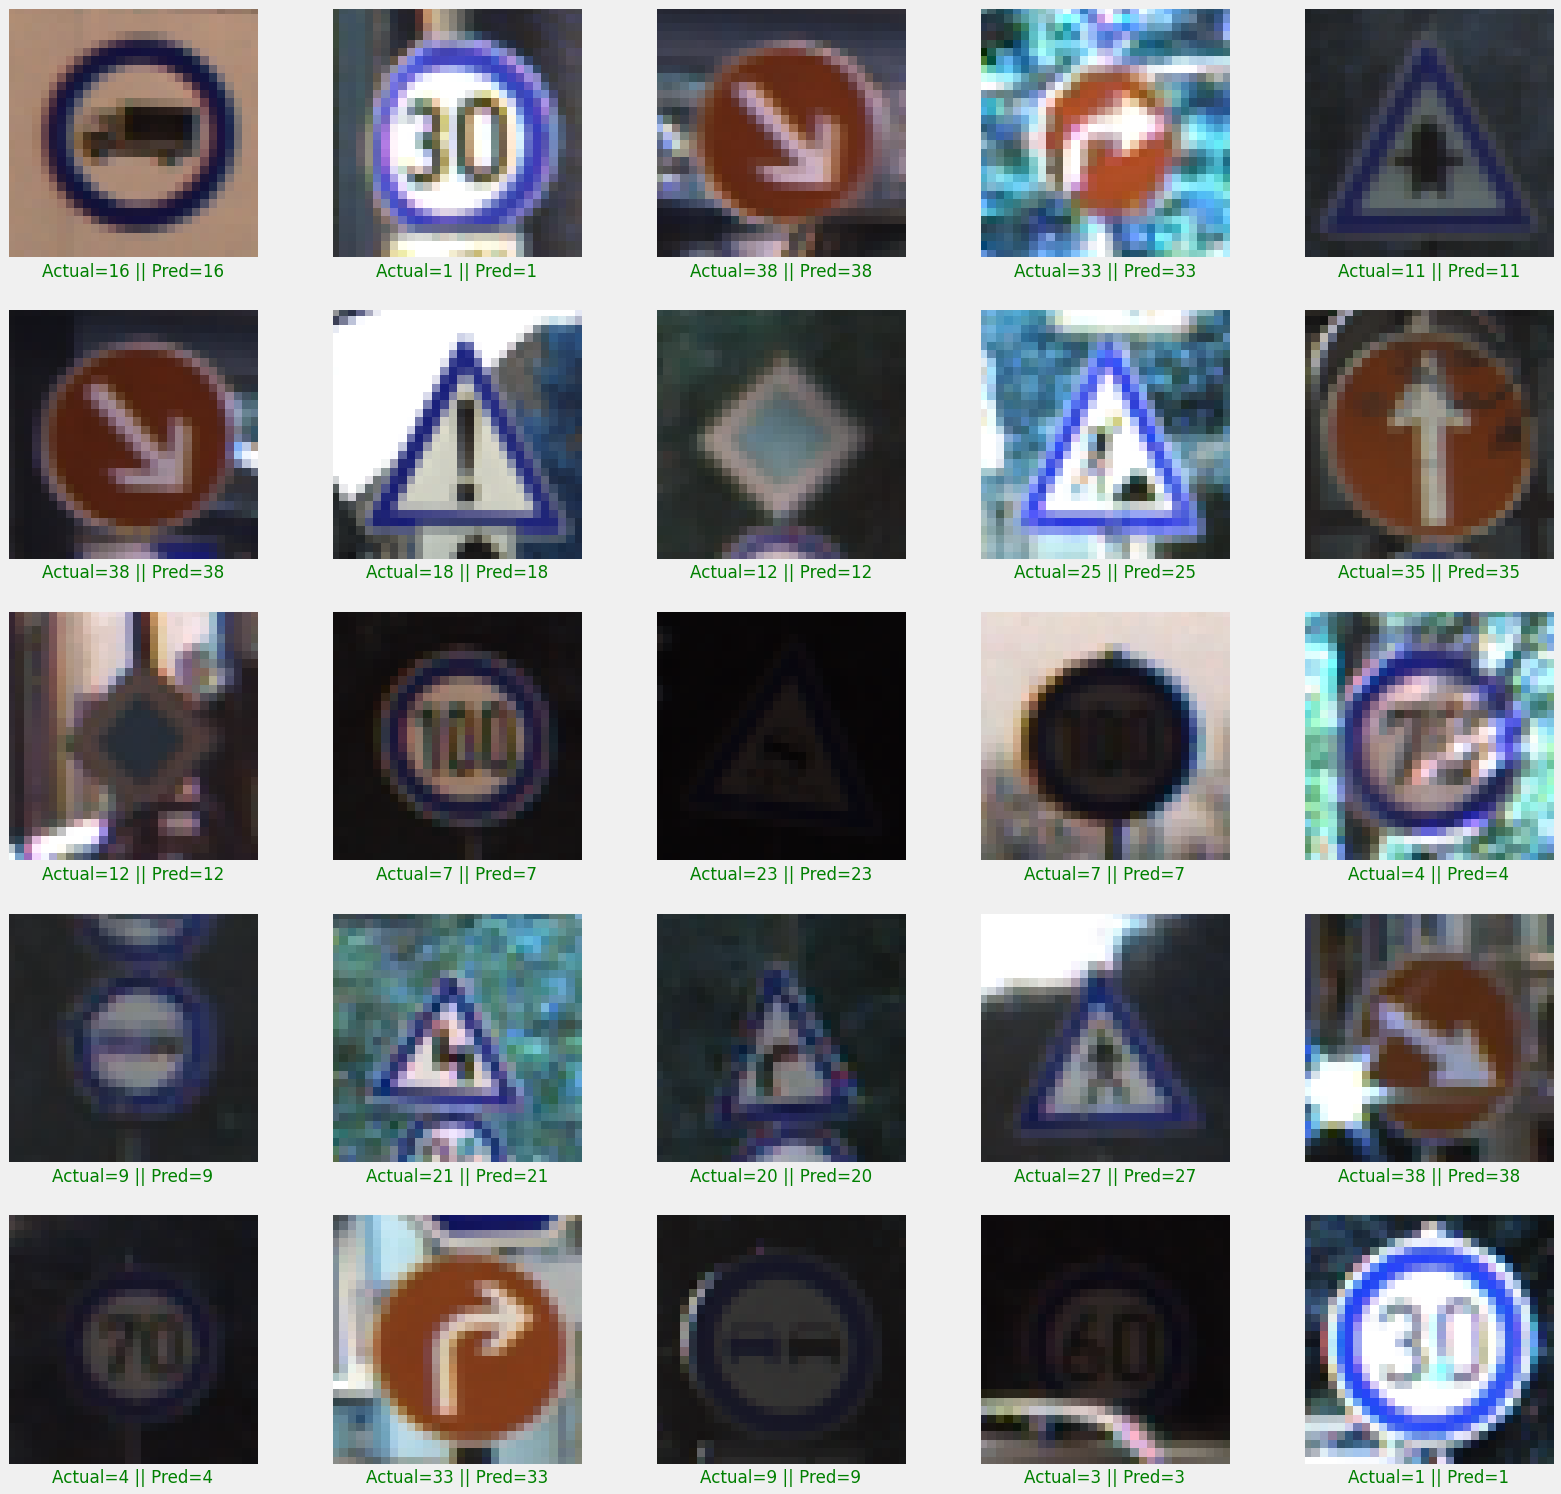

In [ ]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()